# Multiple Linear Regression

<p> Multiple linear regression model uses multiple explanatory variables to predict a single variable of interest. The model also assumes that there is no interaction between the predictors and IID [independent and identically distributed]. In our case, IID is violated, which is why we are also going to build a GLS [Generalized Least Square] model that deals with this issue (James et al., 2021). </p>

#### Let's load the datset

In [1]:
data1 <- read.csv('C:/Users/saisr/Documents/Wayne/Winter 2022/STA 5820/Bike-Sharing-Dataset/hour.csv')

# Making a copy so the original can be referred back if needed 
df1 <- data1

str(df1)

'data.frame':	17379 obs. of  17 variables:
 $ instant   : int  1 2 3 4 5 6 7 8 9 10 ...
 $ dteday    : Factor w/ 731 levels "2011-01-01","2011-01-02",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ season    : int  1 1 1 1 1 1 1 1 1 1 ...
 $ yr        : int  0 0 0 0 0 0 0 0 0 0 ...
 $ mnth      : int  1 1 1 1 1 1 1 1 1 1 ...
 $ hr        : int  0 1 2 3 4 5 6 7 8 9 ...
 $ holiday   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ weekday   : int  6 6 6 6 6 6 6 6 6 6 ...
 $ workingday: int  0 0 0 0 0 0 0 0 0 0 ...
 $ weathersit: int  1 1 1 1 1 2 1 1 1 1 ...
 $ temp      : num  0.24 0.22 0.22 0.24 0.24 0.24 0.22 0.2 0.24 0.32 ...
 $ atemp     : num  0.288 0.273 0.273 0.288 0.288 ...
 $ hum       : num  0.81 0.8 0.8 0.75 0.75 0.75 0.8 0.86 0.75 0.76 ...
 $ windspeed : num  0 0 0 0 0 0.0896 0 0 0 0 ...
 $ casual    : int  3 8 5 3 0 0 2 1 1 8 ...
 $ registered: int  13 32 27 10 1 1 0 2 7 6 ...
 $ cnt       : int  16 40 32 13 1 1 2 3 8 14 ...


In [2]:
df1$instant <- NULL
df1$registered <- NULL
df1$casual <- NULL
df1$season <- as.factor(df1$season)
df1$yr <- as.factor(df1$yr)
df1$mnth <- as.factor(df1$mnth)
df1$hr <- as.factor(df1$hr)
df1$holiday <- as.factor(df1$holiday)
df1$workingday <- as.factor(df1$workingday)
df1$weathersit <- as.factor(df1$weathersit)
df1$weekday <- as.factor(df1$weekday)

print(cor(df1$temp, df1$atemp))
df1$atemp <- NULL # atemp is the normalized feeling temperature in Celsius while temp is 
# Since we want independent predictors when building a mutiple linear regression model and temp & atemp are strongly 
# correlated, it is better to remove this variable. It helps reduce multicollinearity.

df1$dteday <- NULL # Since we are interested in how the condition of the day affects the amount of rental bikes,
# we can remove dteday that states the date on which the data was collected.

[1] 0.9876721


#### Splitting the dataset

In [7]:
# Since this is a time-series data and we need to compare models,  the dataset will not be randomly split into train 
# and test datasets. Instead, the first 13904 observations [80% of the dataset] will be in training set, and the 
# remaining 3475 observations will be in test set.

t <- c(1:13904)
Train <- df1[t,]
Test <- df1[-t,]

train.X <- data.frame(Train[,1:11])
train.y <- c(Train[, 12])
test.x <- data.frame(Test[, 1:11])
test.y <- c(Test[,12])

### Training the model

In [8]:
LM_1 <- lm(cnt ~ ., data=Train)

In [9]:
alias(LM_1)

Model :
cnt ~ season + yr + mnth + hr + holiday + weekday + workingday + 
    weathersit + temp + hum + windspeed

Complete :
            (Intercept) season2 season3 season4 yr1 mnth2 mnth3 mnth4 mnth5
workingday1  0           0       0       0       0   0     0     0     0   
            mnth6 mnth7 mnth8 mnth9 mnth10 mnth11 mnth12 hr1 hr2 hr3 hr4 hr5
workingday1  0     0     0     0     0      0      0      0   0   0   0   0 
            hr6 hr7 hr8 hr9 hr10 hr11 hr12 hr13 hr14 hr15 hr16 hr17 hr18 hr19
workingday1  0   0   0   0   0    0    0    0    0    0    0    0    0    0  
            hr20 hr21 hr22 hr23 holiday1 weekday1 weekday2 weekday3 weekday4
workingday1  0    0    0    0   -1        1        1        1        1      
            weekday5 weekday6 weathersit2 weathersit3 weathersit4 temp hum
workingday1  1        0        0           0           0           0    0 
            windspeed
workingday1  0       


#### The alias function helps find multicollinearity. We can see that workingday1 is causing multicollinearity.

In [10]:
# So, working day variable is removed in both the train and test set. The model is trained again without this variable.
Train$workingday <- NULL
Test$workingday <- NULL

In [11]:
LM_1 <- lm(cnt ~ ., data=Train)

In [12]:
summary(LM_1)


Call:
lm(formula = cnt ~ ., data = Train)

Residuals:
    Min      1Q  Median      3Q     Max 
-336.88  -54.46   -6.64   46.92  459.74 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -66.765      6.562 -10.175  < 2e-16 ***
season2       29.734      4.675   6.360 2.08e-10 ***
season3       16.668      6.022   2.768 0.005649 ** 
season4       40.856      5.981   6.831 8.78e-12 ***
yr1           84.463      1.846  45.766  < 2e-16 ***
mnth2          5.600      3.602   1.555 0.119995    
mnth3         21.225      4.139   5.128 2.97e-07 ***
mnth4         20.302      6.292   3.227 0.001255 ** 
mnth5         34.905      6.821   5.118 3.14e-07 ***
mnth6         25.468      7.199   3.538 0.000405 ***
mnth7         11.341      8.349   1.358 0.174369    
mnth8         22.486      8.459   2.658 0.007862 ** 
mnth9         43.197      7.795   5.542 3.05e-08 ***
mnth10        38.698      7.744   4.997 5.88e-07 ***
mnth11        25.450      7.599   3.349 0.000813 ***


#### We can see many of the variables are statistically significant, which means they are related to the response variable by more than just chance. 

#### Interpretation:
<p> 1. If the season is 2 [summer], then 29 more bikes are rented compared to season1 [spring]. <br>
    2. If the temp [Normalized temperature in Celsius] is increased by 1, the amount of bikes rented goes up by 211. <br>
    3. Adjusted R-Squared is 0.688 which means that 68% of the variation in the response variable can be explained by the predictors. <br>
    4. The F-statistic is 602.2 and is statistically significant because the p-value is less than alpha = 0.1. This means that the coefficients of some predictors are not equal to 0. The model is not completely useless. 
</p>

#### Running Diagnostics on the Model

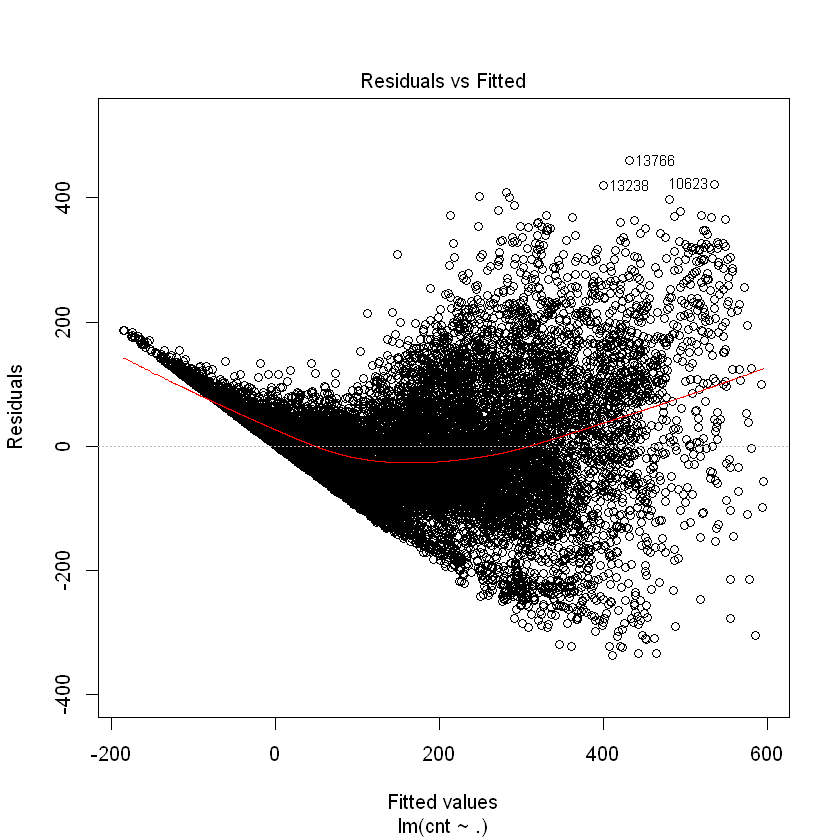

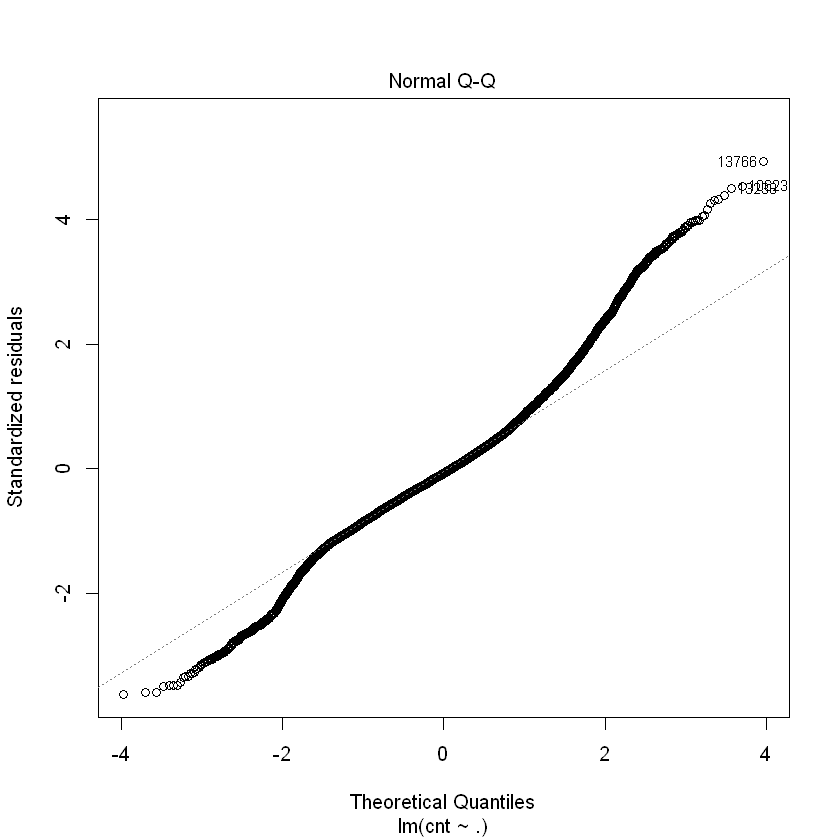

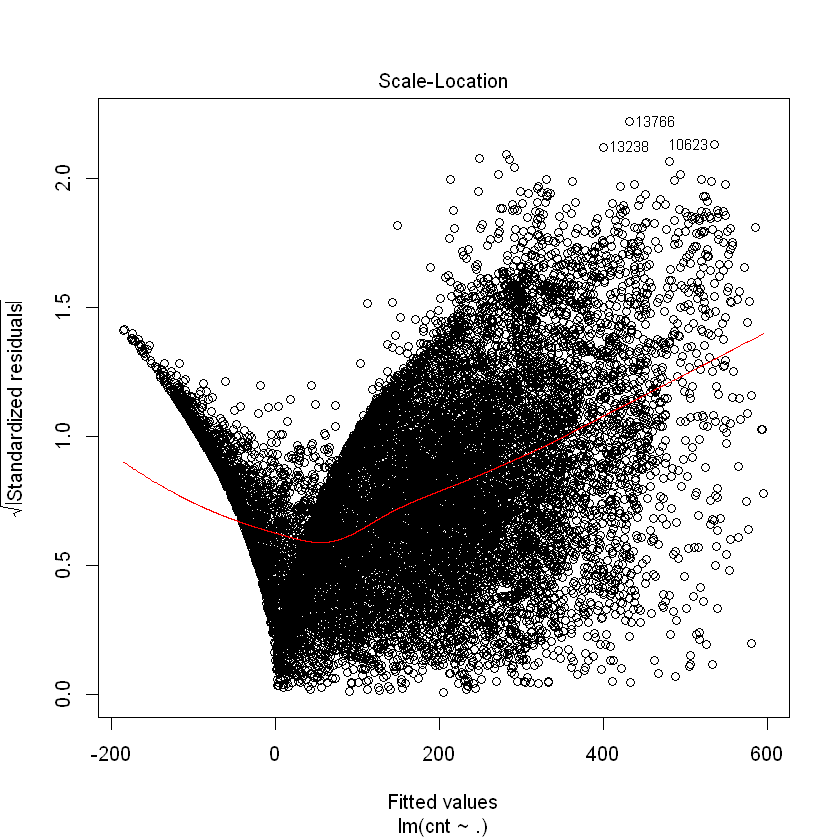

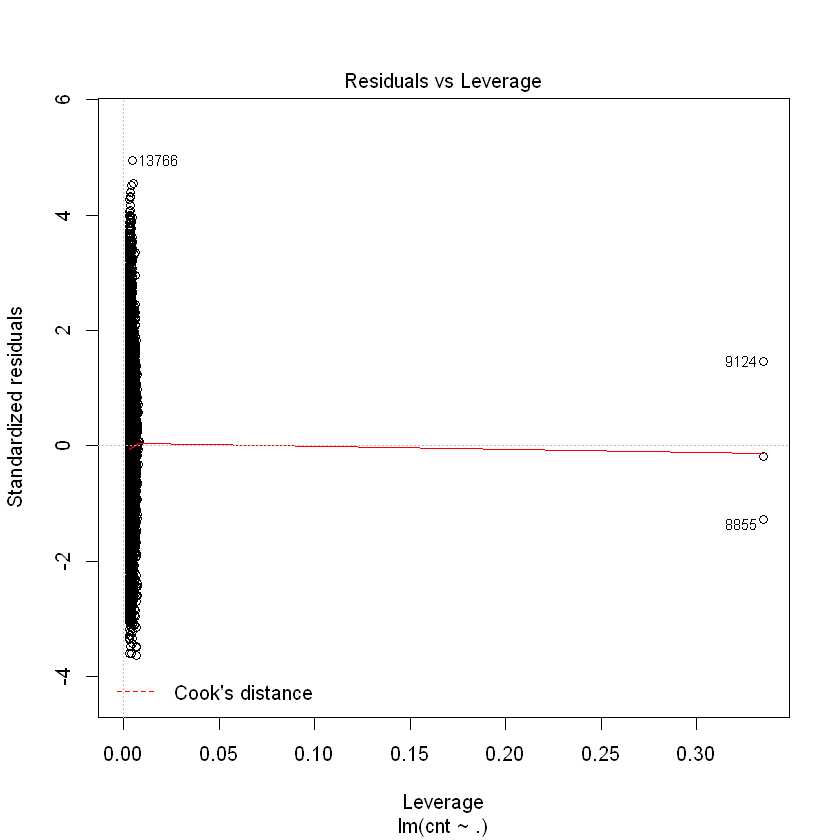

In [13]:
# From the first plot, we can see that residuals have a non-linear pattern which means more information 
# from the predictors can be used to describe the response variable.

# From the second plot, we can see that standardized residuals cannot be considered normal especially at the tails.
# This also violates the assumptions of a multiple linear regression model.

# From the last plot, we can see there are high leverage points such as 9124th observation and the 8855th observation.
# These may distort our regression model.
plot(LM_1)

In [15]:
# The vif helps find multicollinearity between predictors. Since none of GVIF^(1/(2*DF)) numbers are greater than 10, 
# it is safe to assume that multicollinearity does not exist.
library(car)
vif(LM_1) 

Warning message:
"package 'car' was built under R version 3.6.3"Loading required package: carData


,GVIF,Df,GVIF^(1/(2*Df))
season,190.246121,3,2.398203
yr,1.280760,1,1.131707
mnth,396.397305,11,1.312493
hr,1.717844,23,1.011832
holiday,1.121066,1,1.058804
weekday,1.138602,6,1.010875
weathersit,1.402195,3,1.057957
temp,5.635466,1,2.373914
hum,1.925364,1,1.387575
windspeed,1.177652,1,1.085197


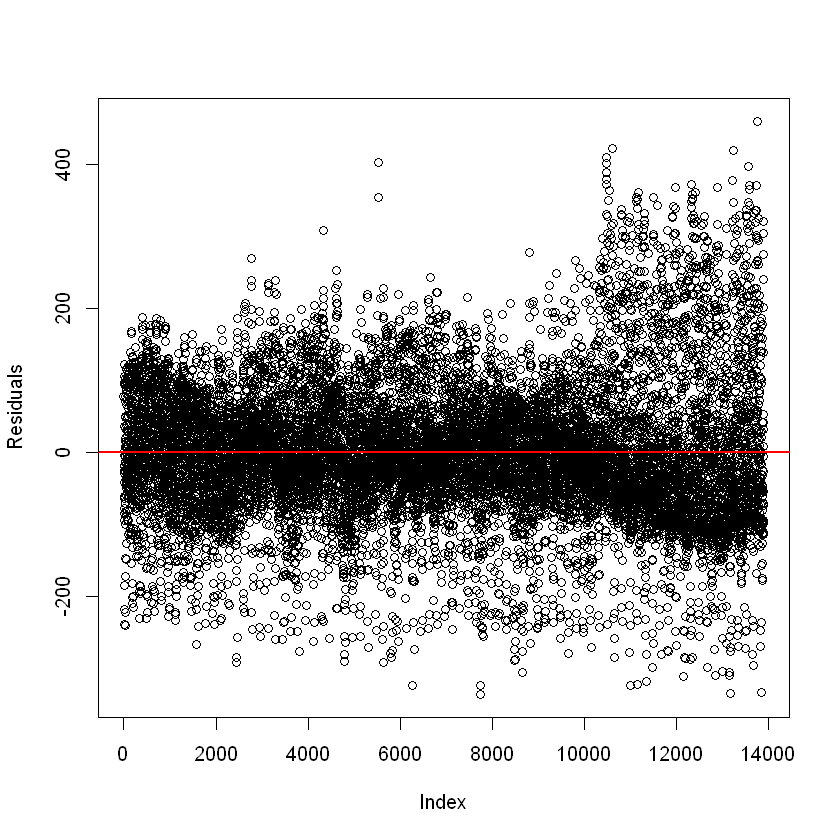

In [16]:
# We can see that IID is violated since there a pattern that can be recognized from the plot below.
# As the index increases, the range between the lowest and highest residual at that index also increases.
# This means the model violates that assumption that there is a constant variance of error terms.

# How has this model violated the IID again? Look at next cell.

e = resid(LM_1)
plot(e, ylab = 'Residuals')
abline(0, 0, col = 'red', lwd=2)

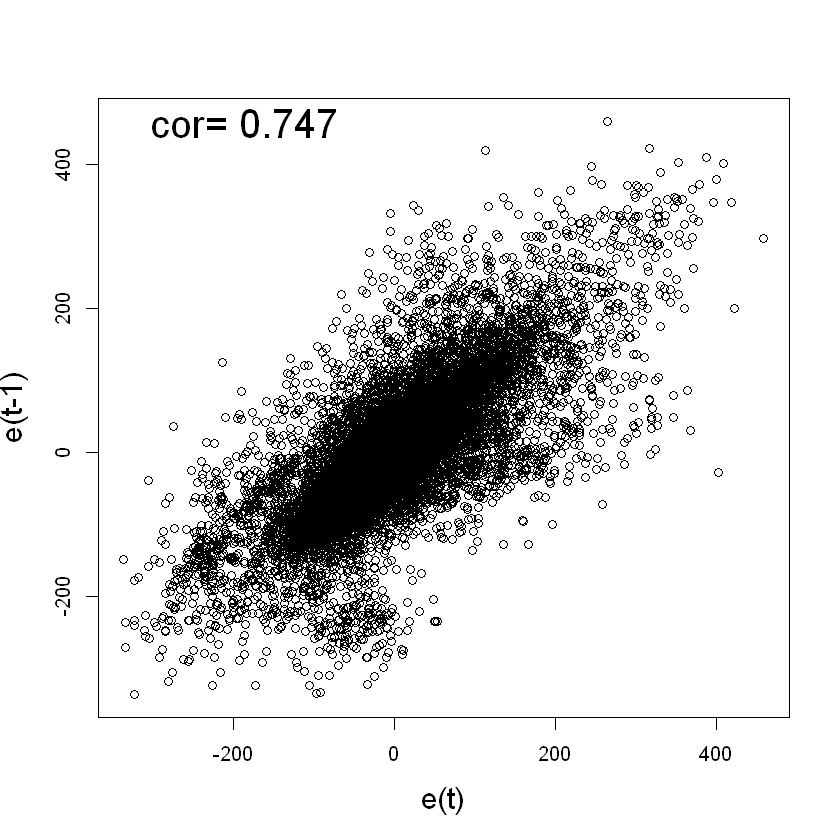

In [18]:
# Correlation of error terms is pretty strong with correlation = 0.747. This means the standard errors of parameters
# estimated are underestimated and it may hinder finding actual statistically significant predictors.

plot(e[2:13904], e[1:13903], xlab = 'e(t)', ylab = 'e(t-1)', 
     cex.lab = 1.5)
text(min(e)+150, max(e)-2, cex=2, labels = paste('cor=', 
                              round(cor(e[2:13904], e[1:13903]), 3)))


### Using the model on the test dataset

In [19]:
pred_tst <- predict(LM_1, newdata = Test)

In [20]:
(mean((test.y-pred_tst)^2)^0.5)

[1] 134.0215

#### The test RMSE is  ~134.02

# Since the error terms are correlated, we are going to build and use a GLS [Generalized Least Square] model. 